In [1]:
import numpy as np

In [2]:
%mkdir dataset
!cp '/content/drive/MyDrive/mix.zip' dataset/
%cd dataset

/content/dataset


In [4]:
!unzip -q mix.zip 
%cd mix

/content/dataset/mix


In [5]:
!cp /content/drive/MyDrive/AtmosphericDustResNet50FineTune.h5 /content/dataset

In [6]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input 

In [10]:
loaded_model = tf.keras.models.load_model('../AtmosphericDustResNet50FineTune.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                64064     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25,700,906
Trainable params: 64,194
Non-

In [19]:
from PIL import Image
import glob
import os

p = '/content/dataset/mix/'
curr_dir = os.getcwd()
pred_list = []
for x in glob.glob(p+'*.png'):
  img=Image.open(x)
  pred_list.append(img)

In [53]:
pilImg_list = []
for i in range(len(pred_list)):
  pilImg_list.append(np.asarray(pred_list[i]))

In [54]:
img_arr = np.array(pilImg_list)

In [55]:
import cv2

img_arr_rn = []
for i in range(len(img_arr)):
  res = cv2.resize(img_arr[i], dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
  img_arr_rn.append(res)

In [56]:
pred_arr = np.array(img_arr_rn)

In [57]:
pred_arr = np.repeat(pred_arr[:, :, :, np.newaxis], 3, axis=3)

In [77]:
from skimage import io
from matplotlib import cm

1/1 [==============================] - 2s 2s/step
Class is: 1


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


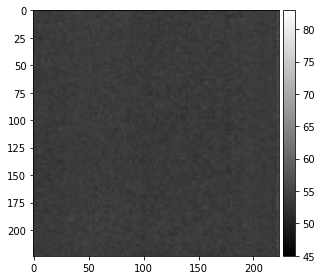

In [60]:
predictions = loaded_model.predict(pred_arr[0:10])
io.imshow(pred_arr[0],cmap='gray')
preds = tf.argmax(predictions[0])
tf.print(f'Class is: {preds}')

Class is: 1


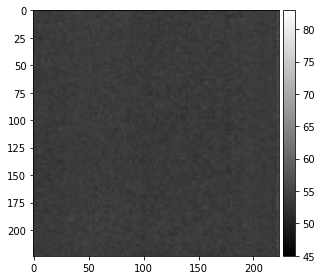

In [42]:
io.imshow(pred_arr[1],cmap='gray')
preds = tf.argmax(predictions[1])
tf.print(f'Class is: {preds}')

1/1 [==============================] - 3s 3s/step
Class is: 0


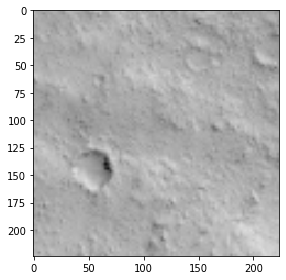

In [115]:
predictions = loaded_model.predict(pred_arr[0:len(pred_arr)])
io.imshow(pred_arr[7],cmap='gray')
preds = tf.argmax(predictions[7])
tf.print(f'Class is: {preds}')

In [72]:
len(pred_arr)

14

In [79]:
pred_arr.shape

(14, 224, 224, 3)

In [90]:
pil_arr = []
for x in pred_arr:
   pil_arr.append(Image.fromarray(x.astype('uint8')))

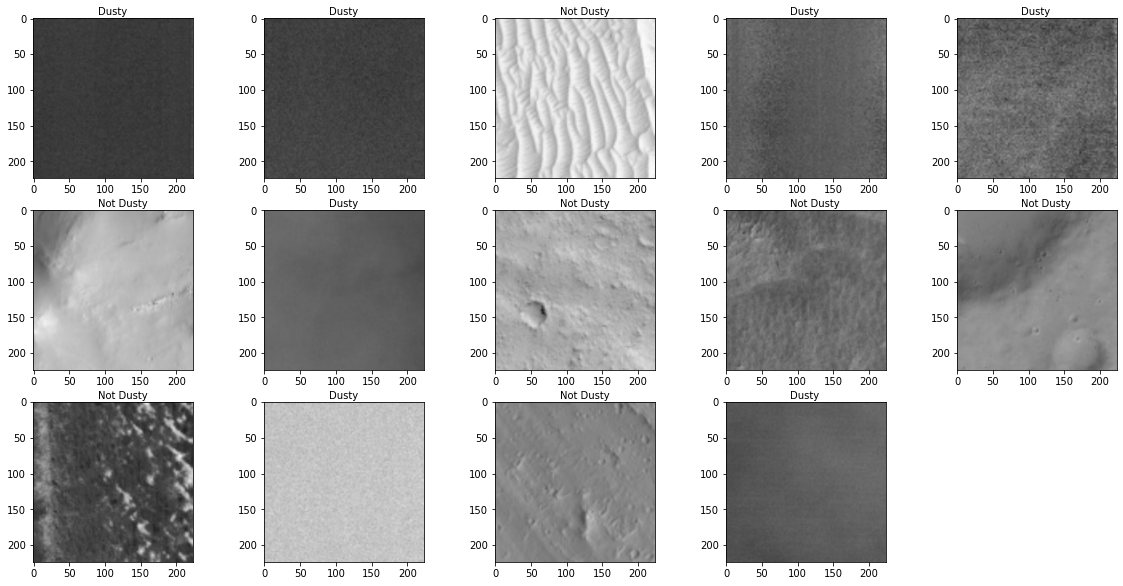

In [123]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(pil_arr):
  plt.subplot(len(pil_arr) / columns + 1, columns, i + 1)
  preds = tf.argmax(predictions[i])
  preds = preds.numpy()
  if preds == 0:
    res = "Not Dusty"
  else:
    res = "Dusty"

  text = f"{res}"
  plt.text(90,-5,text)
  plt.imshow(image, cmap='gray')